In [1]:
# import packages
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

In [2]:
def load_data():
    (train_x, train_y), (test_x, test_y) = mnist.load_data()
    return train_x, train_y, test_x, test_y

In [3]:
def preprocess_data(trainX, trainY, testX, testY):
    # convert y to one-hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    # reshape
    trainX = train_x.reshape((trainX.shape[0], 784))
    testX = test_x.reshape((testX.shape[0], 784))
    # normalize
    trainX = trainX/255
    testX = testX/255
    return trainX, trainY, testX, testY

In [4]:
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=(784,)))
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [5]:
# load data
train_x, train_y, test_x, test_y = load_data()
# preprocessing
train_x, train_y, test_x, test_y = preprocess_data(train_x, train_y, test_x, test_y)
# k-fold
kfold = KFold(10, shuffle=True, random_state=1)
# create history list
accuracies = [0]
histories = []
# chosen
train_idx, test_idx = [], []
# train
for train_ix, test_ix in kfold.split(train_x):
    model = create_model()
    trainX, trainY, testX, testY = train_x[train_ix], train_y[train_ix], train_x[test_ix], train_y[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(test_x, test_y, verbose=0)
    print('> {:.3f}%'.format(acc * 100.0))
    if acc > accuracies[-1]:
        train_idx, test_idx = train_ix, test_ix
    accuracies.append(acc)
    histories.append(history)
    

> 98.020%
> 98.190%
> 97.970%
> 98.050%
> 97.860%
> 98.080%
> 98.100%
> 97.900%
> 98.120%
> 98.050%


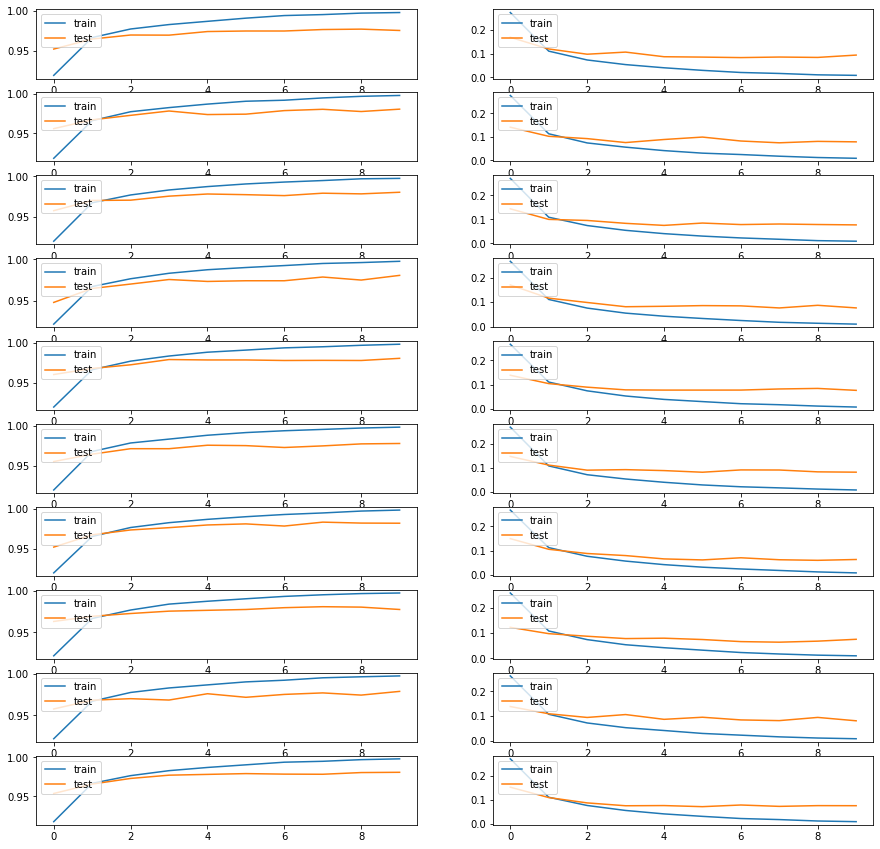

In [6]:
fig, axs = plt.subplots(10, 2, figsize=(15,15))
for i in range(10):
    axs[i, 0].plot(histories[i].history['accuracy'])
    axs[i, 0].plot(histories[i].history['val_accuracy'])
    axs[i, 0].legend(['train', 'test'], loc='upper left')
    axs[i, 1].plot(histories[i].history['loss'])
    axs[i, 1].plot(histories[i].history['val_loss'])
    axs[i, 1].legend(['train', 'test'], loc='upper left')

In [7]:
model = create_model()
trainX, trainY, testX, testY = train_x[train_idx], train_y[train_idx], train_x[test_idx], train_y[test_idx]
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
model.save('model/model.h5')

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2718 - accuracy: 0.9187 - val_loss: 0.1395 - val_accuracy: 0.9590
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1092 - accuracy: 0.9669 - val_loss: 0.1253 - val_accuracy: 0.9617
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0748 - accuracy: 0.9777 - val_loss: 0.0953 - val_accuracy: 0.9707
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.1154 - val_accuracy: 0.9670
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0954 - val_accuracy: 0.9720
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0787 - val_accuracy: 0.9777
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.1084 - val_accuracy:

In [8]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9821


[0.06660611182451248, 0.9821000099182129]